In [1]:
import spacy
import re
from collections import Counter

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
filename = 'meditations.mb.txt'

In [4]:
with open(filename) as f:
    raw_text = f.readlines()

In [5]:
clean_text = ""

for line in raw_text:
    
    if line.startswith('---') or line.startswith('BOOK') or line == '\n':
        continue
        
    line = re.sub('\n',' ', line)
    
    clean_text += line
    
clean_text

'From my grandfather Verus I learned good morals and the government of my temper.  From the reputation and remembrance of my father, modesty and a manly character.  From my mother, piety and beneficence, and abstinence, not only from evil deeds, but even from evil thoughts; and further, simplicity in my way of living, far removed from the habits of the rich. From my great-grandfather, not to have frequented public schools, and to have had good teachers at home, and to know that on such things a man should spend liberally.  From my governor, to be neither of the green nor of the blue party at the games in the Circus, nor a partizan either of the Parmularius or the Scutarius at the gladiators\' fights; from him too I learned endurance of labour, and to want little, and to work with my own hands, and not to meddle with other people\'s affairs, and not to be ready to listen to slander.  From Diognetus, not to busy myself about trifling things, and not to give credit to what was said by mir

In [90]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

#doc = nlp(clean_text)
tokens = separate_punc(clean_text)

In [91]:
dir(tokens[0])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [92]:
len(tokens)

44909

In [94]:
#tokens = [token.text for token in tokens if token.is_stop != True and token.is_punct != True and token.is_space != True]
word_freq = Counter(tokens)
common_words = word_freq.most_common(20)

common_words

[('the', 2142),
 ('and', 2092),
 ('to', 1642),
 ('of', 1345),
 ('is', 1185),
 ('a', 851),
 ('in', 771),
 ('it', 735),
 ('which', 655),
 ('that', 646),
 ('thou', 585),
 ('for', 567),
 ('not', 555),
 ('be', 484),
 ('things', 447),
 ('this', 409),
 ('as', 395),
 ('but', 380),
 ('or', 354),
 ('are', 344)]

In [95]:
text_sequences = []
train_len = 25 + 1

for i in range(train_len, len(tokens)):
    seq = tokens[i-train_len:i]
    
    text_sequences.append(seq)

In [96]:
text_sequences[0]

['from',
 'my',
 'grandfather',
 'verus',
 'i',
 'learned',
 'good',
 'morals',
 'and',
 'the',
 'government',
 'of',
 'my',
 'temper',
 'from',
 'the',
 'reputation',
 'and',
 'remembrance',
 'of',
 'my',
 'father',
 'modesty',
 'and',
 'a',
 'manly']

In [97]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)

In [98]:
help(tokenizer.fit_on_texts)

Help on method fit_on_texts in module keras_preprocessing.text:

fit_on_texts(texts) method of keras_preprocessing.text.Tokenizer instance
    Updates internal vocabulary based on a list of texts.
    
    In the case where texts contains lists,
    we assume each entry of the lists to be a token.
    
    Required before using `texts_to_sequences` or `texts_to_matrix`.
    
    # Arguments
        texts: can be a list of strings,
            a generator of strings (for memory-efficiency),
            or a list of list of strings.



In [99]:
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'to',
 4: 'of',
 5: 'is',
 6: 'a',
 7: 'in',
 8: 'it',
 9: 'which',
 10: 'that',
 11: 'thou',
 12: 'for',
 13: 'not',
 14: 'be',
 15: 'things',
 16: 'this',
 17: 'as',
 18: 'but',
 19: 'or',
 20: 'are',
 21: 'what',
 22: 'man',
 23: 'he',
 24: 'if',
 25: 'with',
 26: 'all',
 27: 'thy',
 28: 'by',
 29: 'who',
 30: 'from',
 31: 'nature',
 32: 'i',
 33: 'thee',
 34: 'they',
 35: 'then',
 36: 'has',
 37: 'have',
 38: 'do',
 39: 'nor',
 40: 'so',
 41: 'one',
 42: 'them',
 43: 'his',
 44: 'such',
 45: 'will',
 46: 'any',
 47: 'those',
 48: 'when',
 49: 'at',
 50: 'no',
 51: 'good',
 52: 'life',
 53: 'these',
 54: 'on',
 55: 'how',
 56: 'art',
 57: 'men',
 58: 'him',
 59: 'does',
 60: 'thyself',
 61: 'same',
 62: 'also',
 63: 'there',
 64: 'time',
 65: 'another',
 66: 'thing',
 67: 'own',
 68: 'an',
 69: 'even',
 70: 'power',
 71: 'reason',
 72: 'every',
 73: 'wilt',
 74: 'everything',
 75: 'about',
 76: 'my',
 77: 'was',
 78: 'without',
 79: 'its',
 80: 'nothing',
 

In [100]:
sequences = tokenizer.texts_to_sequences(text_sequences)

In [101]:
sequences[0]

[30,
 76,
 1066,
 1438,
 32,
 402,
 51,
 733,
 2,
 1,
 1437,
 4,
 76,
 2049,
 30,
 1,
 378,
 2,
 732,
 4,
 76,
 859,
 429,
 2,
 6,
 734]

In [102]:
tokenizer.word_counts

OrderedDict([('from', 7452),
             ('my', 2402),
             ('grandfather', 81),
             ('verus', 56),
             ('i', 6037),
             ('learned', 292),
             ('good', 3569),
             ('morals', 138),
             ('and', 54356),
             ('the', 55646),
             ('government', 63),
             ('of', 34950),
             ('temper', 40),
             ('reputation', 329),
             ('remembrance', 149),
             ('father', 126),
             ('modesty', 283),
             ('a', 22108),
             ('manly', 130),
             ('character', 390),
             ('mother', 338),
             ('piety', 156),
             ('beneficence', 78),
             ('abstinence', 26),
             ('not', 14430),
             ('only', 2184),
             ('evil', 1040),
             ('deeds', 52),
             ('but', 9880),
             ('even', 2522),
             ('thoughts', 884),
             ('further', 364),
             ('simplicity', 260),
    

In [103]:
vocabulary_size = len(tokenizer.word_counts)

In [104]:
vocabulary_size

4050

In [105]:
import numpy as np

sequences = np.array(sequences)
sequences

array([[  30,   76, 1066, ...,    2,    6,  734],
       [  76, 1066, 1438, ...,    6,  734,  323],
       [1066, 1438,   32, ...,  734,  323,   30],
       ...,
       [ 663,    2,   55, ..., 4050,  568,    3],
       [   2,   55,  635, ...,  568,    3,   58],
       [  55,  635,   74, ...,    3,   58,    3]])

In [106]:
X = sequences[:,:-1]
y = sequences[:, -1]

print(X.shape)
print(y.shape)

(44883, 25)
(44883,)


In [107]:
y

array([734, 323,  30, ...,   3,  58,   3])

In [108]:
from keras.utils import to_categorical

y = to_categorical(y, num_classes=vocabulary_size+1)

In [109]:
seq_len = X.shape[1]
seq_len

25

In [110]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout

In [111]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(200, activation='relu'))
    
    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model


In [112]:
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 25, 25)            101275    
_________________________________________________________________
lstm_13 (LSTM)               (None, 25, 50)            15200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)              

In [113]:
from pickle import dump,load
from keras.callbacks import ModelCheckpoint

In [120]:
epochs = 20

filename = f"marcus_aurelius_{epochs}epochs.h5"

checkpoint = ModelCheckpoint(filename, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             mode='auto'
                            )

history = model.fit(X,y, 
                    batch_size=128, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[checkpoint],
                    validation_split=0.25
                   )

Train on 33662 samples, validate on 11221 samples
Epoch 1/20
33662/33662 [==============================] - 52s 2ms/step - loss: 5.5840 - accuracy: 0.0837 - val_loss: 5.9370 - val_accuracy: 0.0749
Epoch 2/20
33662/33662 [==============================] - 52s 2ms/step - loss: 5.5104 - accuracy: 0.0900 - val_loss: 5.9102 - val_accuracy: 0.0894
Epoch 3/20
33662/33662 [==============================] - 52s 2ms/step - loss: 5.4378 - accuracy: 0.0972 - val_loss: 5.9139 - val_accuracy: 0.0953
Epoch 4/20
33662/33662 [==============================] - 52s 2ms/step - loss: 5.3841 - accuracy: 0.0984 - val_loss: 5.9158 - val_accuracy: 0.0956
Epoch 5/20
33662/33662 [==============================] - 52s 2ms/step - loss: 5.3340 - accuracy: 0.1024 - val_loss: 5.9012 - val_accuracy: 0.0980
Epoch 6/20
33662/33662 [==============================] - 58s 2ms/step - loss: 5.2811 - accuracy: 0.1071 - val_loss: 5.9064 - val_accuracy: 0.1036
Epoch 7/20
33662/33662 [==============================] - 52s 2ms/st

In [121]:
dump(tokenizer, open('marcus_aurelius_tokenizer','wb'))

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


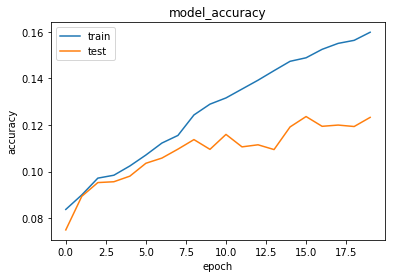

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [123]:
from keras.preprocessing.sequence import pad_sequences

def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    
    output_text = []
    
    input_text = seed_text
    
    for i in range(num_gen_words):
        
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        pred_word = tokenizer.index_word[pred_word_ind]
        input_text += ' ' + pred_word
        output_text.append(pred_word)
    
    return ' '.join(output_text)

In [124]:
import random

random.seed(100)
random_pick = random.randint(0, len(text_sequences))
random_seed_text = text_sequences[random_pick]
' '.join(random_seed_text)

'then is this to thee and i say not what is it to the dead but what is it to the living what is praise except   a n d   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n   m a n'

In [125]:
generate_text(model, tokenizer, seq_len, seed_text=random_seed_text, num_gen_words=25)

'own own man own man own man own man own man own man own man own man own man own man own man own man'